# ПРОГНОЗИРОВАНИЕ РАКА ЛЁГКИХ

# ИНФОРМАЦИЯ О ДАТАСЕТЕ:

Эффективность систем прогнозирования рака помогает людям узнать свой риск развития рака с низкими затратами, а также принять соответствующее решение, основанное на их статусе риска развития рака.

Количество показателей: **16**

Количество случаев: **284**

Список показателей (в скобках указан перевод, расшифровка, пояснение) и их тип данных:
1. **Gender** (*пол*): M (male - мужской), F(female - женский). 
2. **Age** (*возраст*): Age of the patient (возраст пациента).
3. **Smoking** (*курение*): YES=2 , NO=1.
4. **Yellow_fingers** (*жёлтые пальцы от курения*): YES=2 , NO=1.
5. **Anxiety** (*тревожность*): YES=2 , NO=1.
6. **Peer_pressure** (*“давление” сверстников, плохое окружение*): YES=2 , NO=1.
7. **ChrFatigueonic Disease** (*хронические болезни*): YES=2 , NO=1.
8. **Fatigue** (*утомляемость*): YES=2 , NO=1.
9. **Allergy** (*аллергия*): YES=2 , NO=1.
10. **Wheezing** (*хрипы при дыхании*): YES=2 , NO=1.
11. **Alcohol** (*употребление алкоголя*): YES=2 , NO=1.
12. **Coughing** (*кашель*): YES=2 , NO=1.
13. **Shortness of Breath** (*одышка - изменение частоты, глубины и ритма дыхания*): YES=2 , NO=1.
14. **Swallowing Difficulty** (*затрудненное глотание*): YES=2 , NO=1.
15. **Chest pain** (*боли в груди*): YES=2 , NO=1.
16. **Lung Cancer** (*целевой параметр, наличие рака лёгкого*): YES , NO.

<div style="display:fill;
            background-color:#d3dded;
            font-size:100%;
            letter-spacing:0.5px;
            padding:5px;
            color:black;
            border-style: solid;
            border-color: black;
<b>

*Список показателей (в скобках указан перевод, расшифровка, пояснение) и их тип данных:*

Gender (**пол**): M (male - мужской), F(female - женский). Бинарный 

Age (**возраст**): Age of the patient (возраст пациента). Количественный.

Smoking (**курение**): YES=2 , NO=1.

Yellow fingers(**жёлтые пальцы от курения**): YES=2 , NO=1.

Anxiety(**тревожность**): YES=2 , NO=1.

Peer_pressure(“давление” сверстников, **плохое окружение**): YES=2 , NO=1.

Chronic Disease(**хронические болезни**): YES=2 , NO=1.

Fatigue(**утомляемость**): YES=2 , NO=1.

Allergy(**аллергия**): YES=2 , NO=1.

Wheezing(**хрипы при дыхании**, слышное без фонендоскопа): YES=2 , NO=1.

Alcohol(**употребление алкоголя**): YES=2 , NO=1.

Coughing(**кашель**): YES=2 , NO=1.

Shortness of Breath(**одышка** - изменение частоты, глубины и ритма дыхания): YES=2 , NO=1.

Swallowing Difficulty(**затрудненное глотание**): YES=2 , NO=1.

Chest pain(**боль в грудной клетке**): YES=2 , NO=1.

**Lung Cancer(целевой параметр, наличие рака лёгкого): YES , NO.**


# Импортирование библиотек, скриптов и датасета:

In [184]:
#загружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
#от глазных мозолей
import warnings
warnings.filterwarnings('ignore')

In [185]:
#загружаем датасет
df = pd.read_csv(r"C:\Users\zhana\Documents\HW\survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# 1. Сведения о датасете:

In [186]:
#данные о датасете:
print(f'В датасете {df.shape[0]} - наблюдений, {df.shape[1]} - столбцов')

В датасете 309 - наблюдений, 16 - столбцов


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

В наборе нет пропусков.

# 2. Анализ данных

In [188]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Средний возраст в датасете ~62г. Данные несбалансированы, в большинстве переменных mean > 1.50, а медиана(50%) = 2 

Отделим количественные переменные от категориальных для визуализации:

In [189]:
con_col = ['AGE']
cat_col=[]
for i in df.columns:
    if i!='AGE':
        cat_col.append(i)

Визуализируем данные о возрасте в 2х группах:

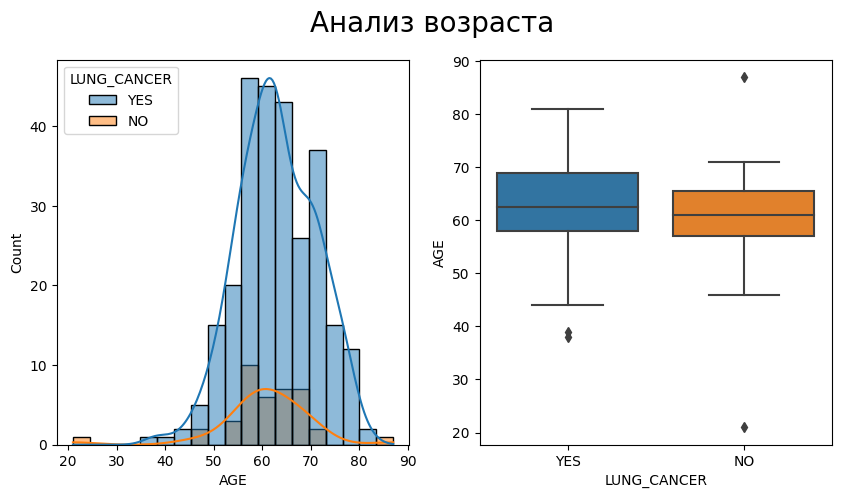

In [190]:
fig,ax = plt.subplots(1,2,figsize=(10, 5))
sns.histplot(data =df,x='AGE',ax=ax[0],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=df['LUNG_CANCER'],y=df['AGE'],ax=ax[1])
plt.suptitle("Анализ возраста", size=20)
plt.show()

В соответствии с классификацией ВОЗ в наборе данных в основном люди среднего(45-59) и пожилого(60-74) возраста. 

Имеются выбросы, которые видны в диаграмме "ящик с усами". Выбросы мы оставим.

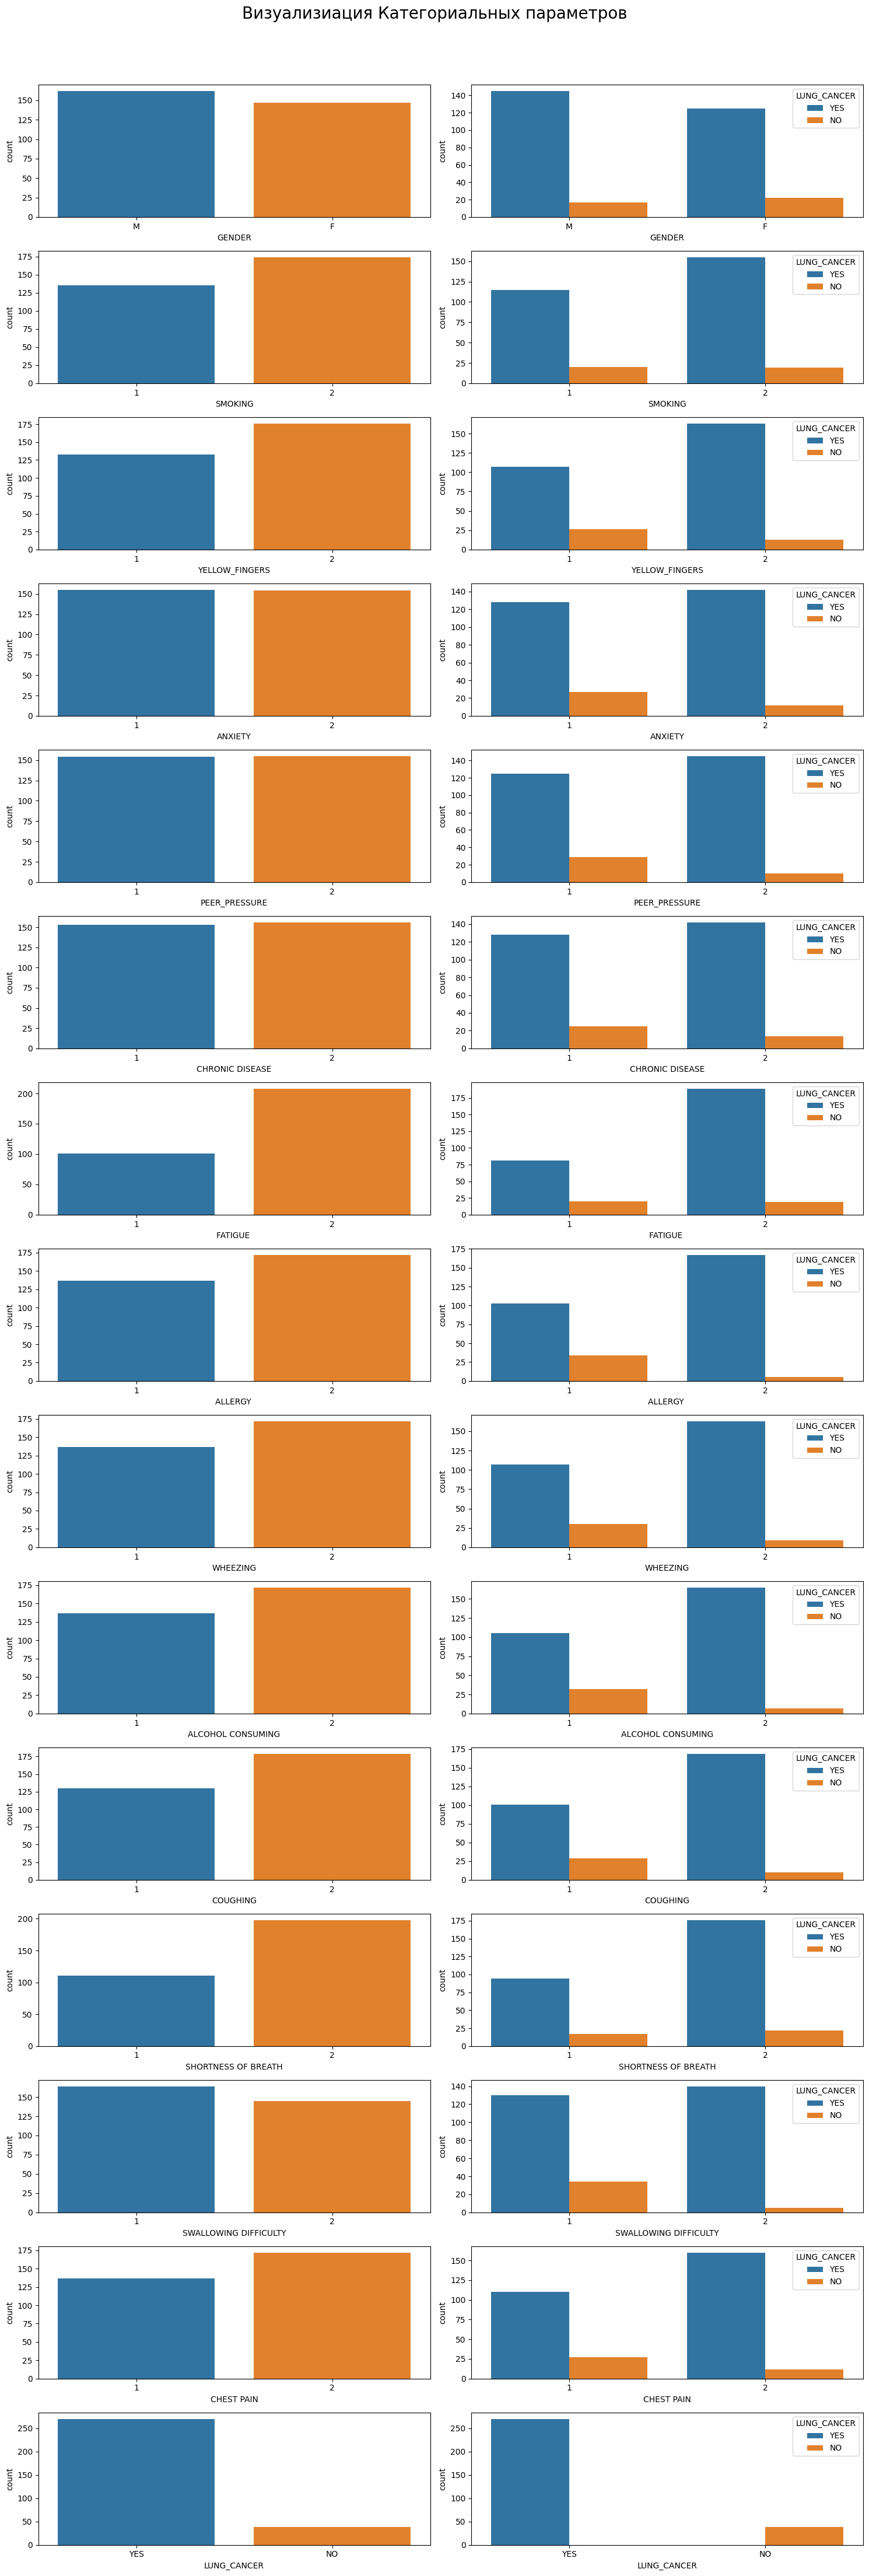

In [191]:
fig,ax = plt.subplots(15,2,figsize=(15,45))
for index,i in enumerate(cat_col):
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Визуализиация Категориальных параметров",fontsize=20)
fig.show()

С раком легких ассоциированы:
мужской пол, курение, жёлтые пальцы, тревожность, "плохое" окружение, хронические болезни, утомляемость, аллергия, приём алкоголя, кашель, одышка, затрудненное глотание, боли в груди.

Данные сильно несбалансированы, в датасете большая часть имеют рак легкого.

# 3. преобразование данных

Параметры GENDER и LUNG_CANCER необходимо перевести из **object** в **int64** с помощью модуля LabelEncoder.

Перезаписываем переменные: GENDER (М > 1, F > 0); LUNG_CANCER (YES > 1, NO > 0).

In [192]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


Разделим таргетный показатель от других переменных:

In [193]:
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

Перепишем значения "2" > "1"; "1" > "0" в оставшихся параметрах:

In [194]:
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


**Сбалансируем переменные, путём увеличения наблюдений миноритарного класса. Используем RandomOverSampler.**

In [195]:
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

**Разделяем на обучающую и контрольную выборки:**

In [196]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (405, 15)
Test shape: (135, 15)


**Масштабируем переменную AGE. Используем StandartScaler.**

In [197]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
210,1,-1.029617,1,0,0,0,0,0,1,1,1,1,0,0,0
254,1,1.557200,0,1,0,0,1,1,1,1,1,1,1,0,1
83,0,2.462586,0,0,0,1,1,0,1,0,1,1,1,0,0
281,1,-0.900276,1,0,0,0,0,1,1,0,0,0,1,0,1
42,0,1.945223,0,1,1,1,1,1,0,1,1,0,0,0,0


**Разбиваем данные:**

In [198]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (405, 15)
Test shape: (135, 15)


# 4. Построение моделей:

**Импорт моделей, метрик:**

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import metrics

**Линейная регрессия:**

In [200]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [201]:
Y_pred_lr = lr.predict(X_test)

**Алгоритм случайного леса:**

In [202]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(X_train, y_train.values[:])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [203]:
Y_pred_model = model.predict(X_test)

**Логистическая регрессия:**

In [204]:
log = LogisticRegression(solver='lbfgs')
log.fit(X_train,y_train)

LogisticRegression()

In [205]:
y_pred_log=log.predict(X_test)

# 5. Определение лучшей модели:

In [206]:
forest_r2 = r2_score(y_test, Y_pred_model)
log_r2 = r2_score(y_test, y_pred_log)
lr_r2 = r2_score(y_test, Y_pred_lr)

In [207]:
print(forest_r2, log_r2, lr_r2)

0.8540617405618964 0.5851624231782264 0.6300984967657122


In [208]:
lr_auc = metrics.roc_auc_score(y_test, Y_pred_lr)
LogR_auc = metrics.roc_auc_score(y_test, y_pred_log)
forest_auc = metrics.roc_auc_score(y_test, Y_pred_model)

In [209]:
print(forest_auc, lr_auc, LogR_auc)

0.9845258999122037 0.9564310798946444 0.8960711150131695


**Подходящая модель для прогнозирования Рака лёгких алгоритм случайного леса (из 3х)**